<a href="https://colab.research.google.com/github/khaichi11/py-ch/blob/ai/AI5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Langkah 1: Mendeskripsikan Data

### Mengimport Dataset

In [103]:
import pandas as pd
data_cafe = pd.read_csv('/content/drive/MyDrive/AITF/AITF Self-Practice Data Screening/data_cafe_clean.csv', delimiter=',')

### Melihat Jumlah Data

In [104]:
print("Jumlah data (baris, klom): ", data_cafe.shape)

Jumlah data (baris, klom):  (7807, 8)


### Informasi Mengenai Tipe Data

In [105]:
print("Informasi tipe data: ")
print(data_cafe.info())

Informasi tipe data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7807 entries, 0 to 7806
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    7807 non-null   object 
 1   Item              7807 non-null   object 
 2   Quantity          7807 non-null   float64
 3   Price Per Unit    7807 non-null   float64
 4   Total Spent       7807 non-null   float64
 5   Payment Method    7807 non-null   object 
 6   Location          7807 non-null   object 
 7   Transaction Date  7807 non-null   object 
dtypes: float64(3), object(5)
memory usage: 488.1+ KB
None


### Melihat Lima Baris Teratas

In [106]:
print(data_cafe.head())

  Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0    TXN_1961373    Coffee       2.0             2.0          4.0   
1    TXN_4977031      Cake       4.0             3.0         12.0   
2    TXN_4271903    Cookie       4.0             1.0          8.0   
3    TXN_3160411    Coffee       2.0             2.0          4.0   
4    TXN_2602893  Smoothie       5.0             4.0         20.0   

   Payment Method  Location Transaction Date  
0     Credit Card  Takeaway       2023-09-08  
1            Cash  In-store       2023-05-16  
2     Credit Card  In-store       2023-07-19  
3  Digital Wallet  In-store       2023-06-11  
4     Credit Card  Takeaway       2023-03-31  


### Mengubah Tipe Data transaction_date

In [108]:
data_cafe['Transaction Date'] = pd.to_datetime(data_cafe['Transaction Date'], errors='coerce')

### Memastikan Apakah Tipe Data Sudah Berubah

In [109]:
print("Tipe Data:\n ")
print(data_cafe.dtypes)

Tipe Data:
 
Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object


### Menampilkan Statistik Deskriptif

In [110]:
print("\nStatistik deskriptif data numerik:")
print(data_cafe.describe())


Statistik deskriptif data numerik:
          Quantity  Price Per Unit  Total Spent               Transaction Date
count  7807.000000     7807.000000  7807.000000                           7807
mean      3.033047        2.957986     8.895735  2023-07-02 11:47:10.844114432
min       1.000000        1.000000     1.000000            2023-01-01 00:00:00
25%       2.000000        2.000000     4.000000            2023-04-01 00:00:00
50%       3.000000        3.000000     8.000000            2023-07-02 00:00:00
75%       4.000000        4.000000    12.000000            2023-10-03 00:00:00
max       5.000000        5.000000    24.000000            2023-12-31 00:00:00
std       1.387763        1.245577     5.820277                            NaN


### Menampilkan Jumlah Nilai Unik

In [111]:
print("\nJumlah nilai unik tiap kolom:")
for col in data_cafe.columns:
    print(f"{col}: {data_cafe[col].nunique()}")


Jumlah nilai unik tiap kolom:
Transaction ID: 7807
Item: 8
Quantity: 5
Price Per Unit: 6
Total Spent: 17
Payment Method: 3
Location: 2
Transaction Date: 365


### Melakukan Pengkodean pada Kolom Kategorikal Item

In [115]:
data_cafe['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Smoothie', 'Juice', 'Sandwich',
       'Salad', 'Tea'], dtype=object)

In [116]:
data_cafe['Item'] = data_cafe['Item'].map({'Coffee':1,'Cake':2, 'Cookie':3, 'Salad':4, 'Smoothie':5,
       'Sandwich':6, 'Juice':7, 'Tea':8})

### Melakukan Pengkodean pada Kolom Payment Method

In [98]:
data_cafe['Payment Method'].unique()

array(['Credit Card', 'Cash', 'Digital Wallet'], dtype=object)

In [113]:
data_cafe['Payment Method'] = data_cafe['Payment Method'].map({'Credit Card':1,'Cash':2, 'Digital Wallet':3})

### Melakukan Pengkodean pada Kolom Location

In [118]:
data_cafe['Location'].unique()

array(['Takeaway', 'In-store'], dtype=object)

In [119]:
data_cafe['Location'] = data_cafe['Location'].map({'Takeaway':1,'In-store':2})

### Menghilangkan Kolom Transaction ID

In [121]:
data_cafe = data_cafe.drop(columns=['Transaction ID'])

## Langkah 2: Eksplorasi Data

### Menampilkan Distribusi Data Numerik

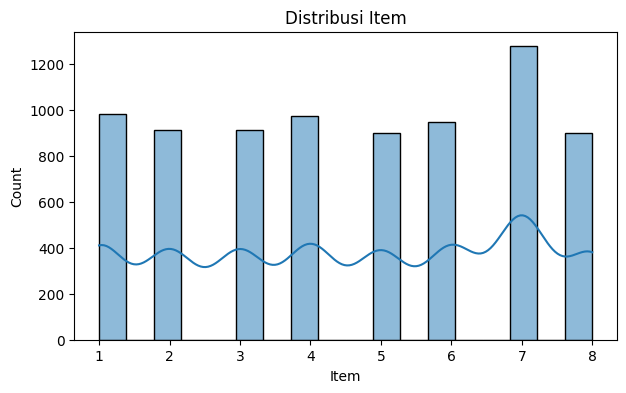

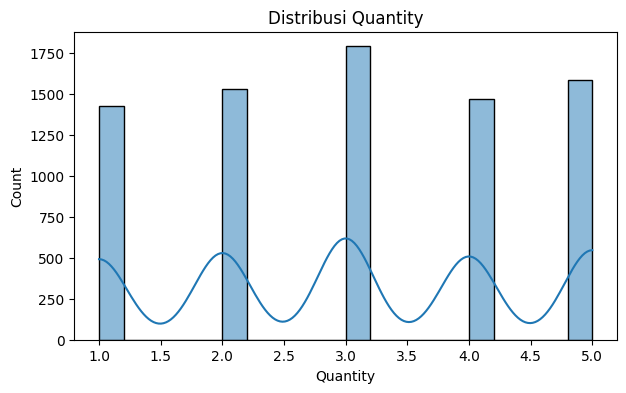

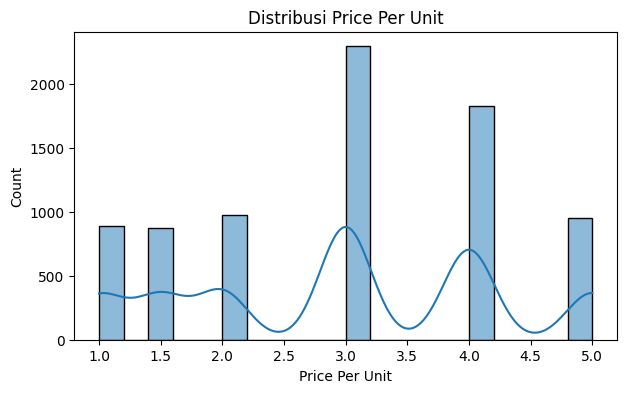

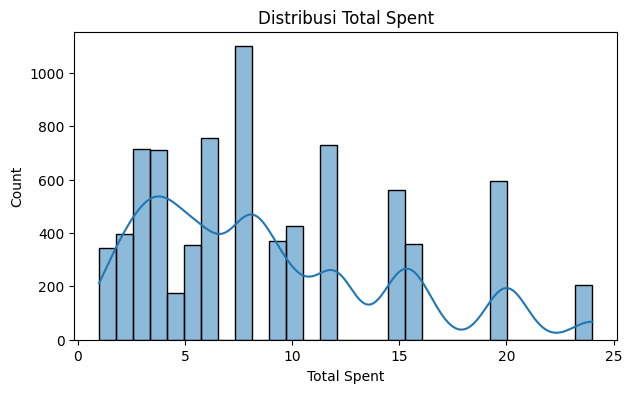

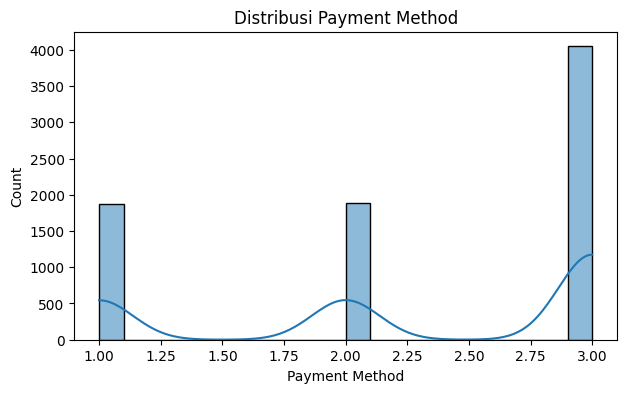

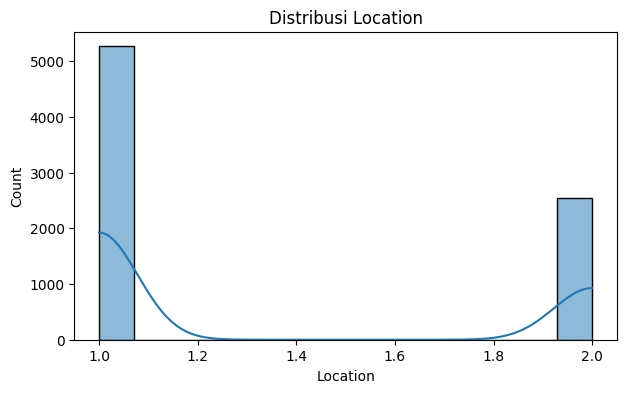

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = data_cafe.select_dtypes(include='number').columns

for col in numerical_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(data_cafe[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()


### Menampilkan Korelasi Antar Variabel Numerik

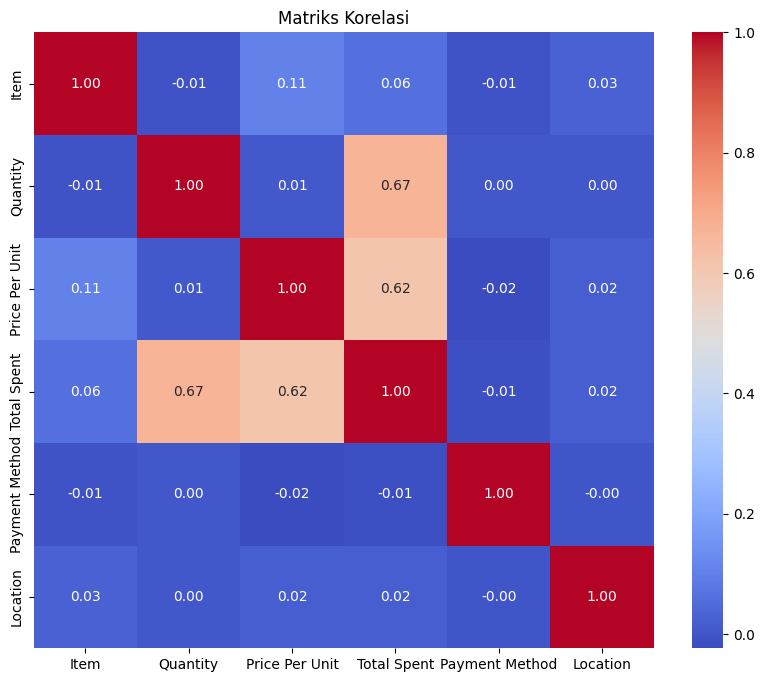

In [124]:
plt.figure(figsize=(10,8))
correlation_matrix = data_cafe[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()


### Melakukan Deteksi Outlier Menggunakan Boxplot

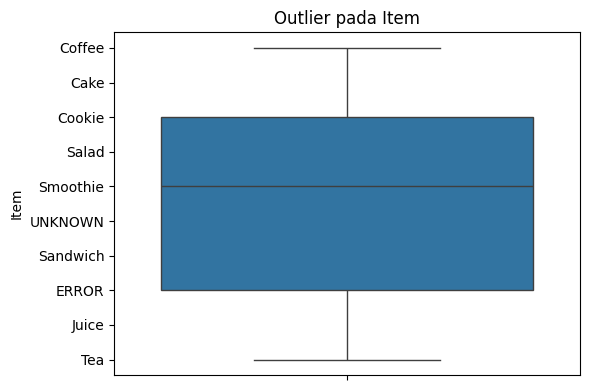

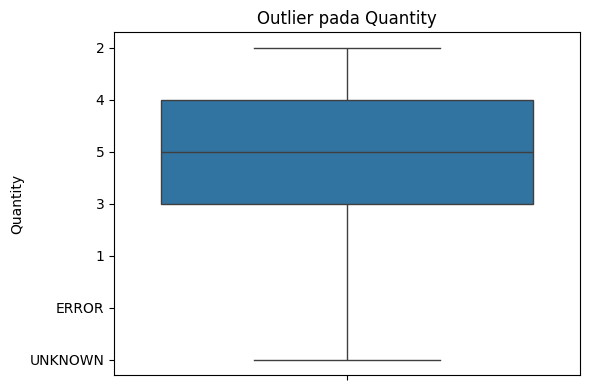

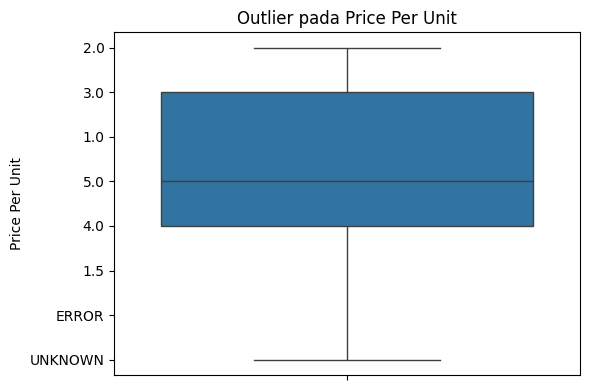

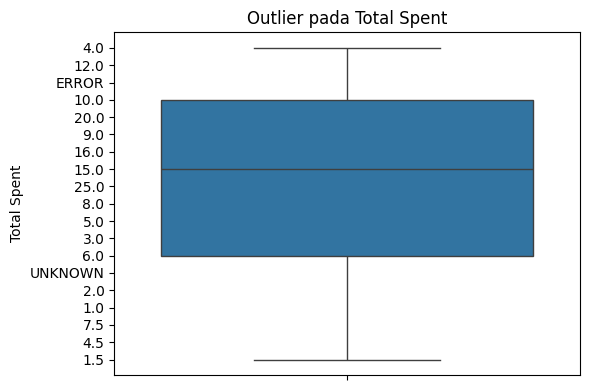

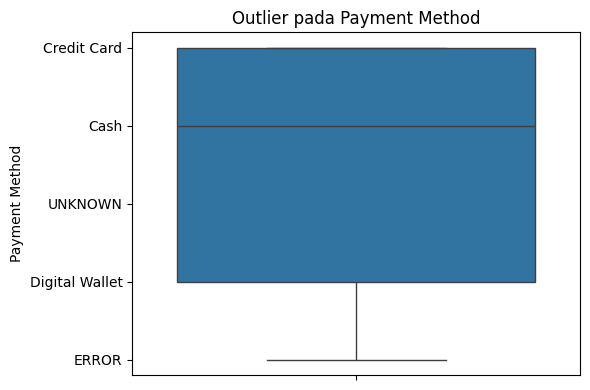

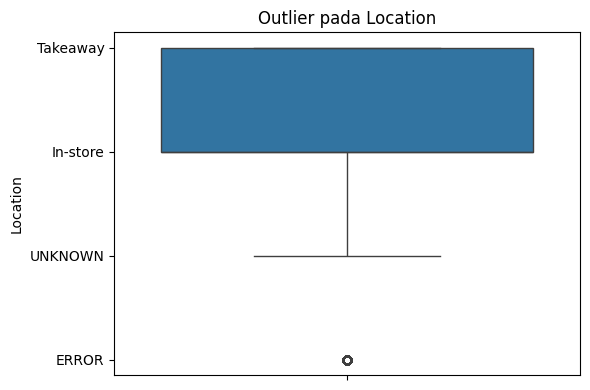

In [127]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=data[col])
    plt.title(f'Outlier pada {col}')
    plt.tight_layout()
    plt.show()


### Melakukan Analisis Missing Value

In [128]:
print("\nJumlah nilai hilang setiap kolom:")
print(data_cafe.isnull().sum())



Jumlah nilai hilang setiap kolom:
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64


## Langkah 3: Verifikasi Kualitas Data

In [129]:
# Contoh validasi nilai negatif
for col in numerical_cols:
    if (data_cafe[col] < 0).sum() > 0:
        print(f"Terdapat nilai negatif pada kolom {col}")
    else:
        print(f"Kolom {col} tidak memiliki nilai negatif")


Kolom Item tidak memiliki nilai negatif
Kolom Quantity tidak memiliki nilai negatif
Kolom Price Per Unit tidak memiliki nilai negatif
Kolom Total Spent tidak memiliki nilai negatif
Kolom Payment Method tidak memiliki nilai negatif
Kolom Location tidak memiliki nilai negatif


In [136]:
duplicate_count = data_cafe.duplicated().sum()
print(f"\nJumlah data duplikat: {duplicate_count}")


Jumlah data duplikat: 303


In [140]:
data = data_cafe.drop_duplicates()

In [141]:
print("Duplikat seluruh baris:", data.duplicated().sum())

Duplikat seluruh baris: 0


In [142]:
for col in numerical_cols:
    print(f"\nValidasi rentang {col}")
    print("Min:", data[col].min())
    print("Max:", data[col].max())



Validasi rentang Item
Min: 1
Max: 8

Validasi rentang Quantity
Min: 1.0
Max: 5.0

Validasi rentang Price Per Unit
Min: 1.0
Max: 5.0

Validasi rentang Total Spent
Min: 1.0
Max: 24.0

Validasi rentang Payment Method
Min: 1
Max: 3

Validasi rentang Location
Min: 1
Max: 2
